In [ ]:
print('CypherAk007')

CypherAk007


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

Data collection and processing

In [ ]:
# loading the csv data to a pandas DataFrame
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# print first rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# printlastrows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# no. of rows and col
gold_data.shape

(2290, 6)

In [ ]:
# info abt data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# no. of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting stats measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Find corelation:
- Positive Correlation (gld inc. slvr inc.)
- Negative Correlation (USD inc. gld desc).

In [ ]:
correlation = gold_data.corr()

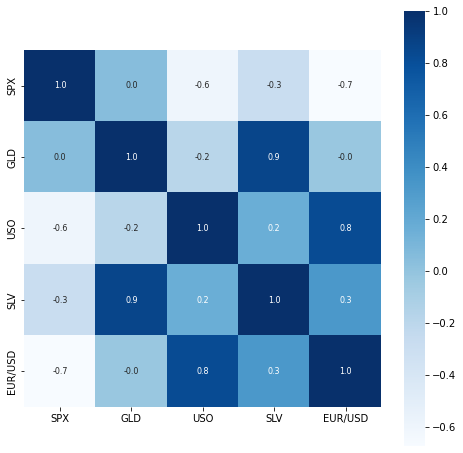

In [ ]:
# construct heat map to understand coorlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,
            annot_kws={'size':8},cmap='Blues')
#fmt-no.of decimal pts
# annot-name of col and annot_kws size

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


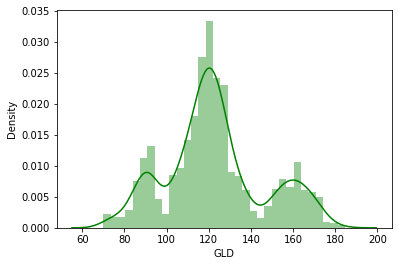

In [ ]:
# check distrbution of gold price
sns.distplot(gold_data['GLD'],color='green')

- Mostly the price lie in the range of 120.

In [ ]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting data into train and test

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training:
Random forest regressor 
- multiple decision trees with mean and median of all the decision at the end.

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evalvation 

In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.58349945  82.15449974 116.21720001 127.44070074 120.69270137
 154.77169749 150.36499755 126.17620025 117.4432988  126.08440054
 116.68490125 171.38160062 141.99459797 168.1581991  115.20389997
 117.49480041 139.32900316 170.26730078 159.01820259 161.9945992
 155.0853001  125.21029993 175.77889978 157.39760334 125.31360033
  93.72149971  77.85189985 120.53169983 119.07939941 167.40499966
  88.30610071 125.15540024  91.12520097 117.59340028 121.15779869
 136.76620074 115.68170079 114.90270088 146.21530031 107.4529011
 104.59910232  87.13869756 126.53700058 117.9735001  150.22699924
 119.56820021 108.50880004 107.93969827  93.13280054 127.13099765
  74.76690043 113.73289923 121.47679996 111.14799942 118.90729912
 120.56799939 160.10339988 169.29170071 146.93649687  85.74359851
  94.1200003   86.68489891  90.48120015 118.9847006  126.36520113
 127.50599991 170.19519984 122.25539939 117.36989897  98.46460088
 168.4775014  143.07289832 132.3762027  121.23670243 121.05799956
 119.8940008

Compare predicted with test value

In [ ]:
# R square error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.9888904264768654


Compare actual val and pred val in plot

In [ ]:
Y_test=list(Y_test)


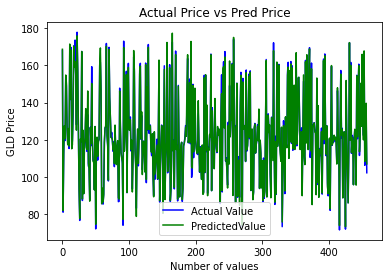

In [ ]:
from scipy.ndimage.measurements import label
plt.plot(Y_test,color='blue',label = 'Actual Value')
plt.plot(test_data_prediction,color='green',label='PredictedValue')
plt.title('Actual Price vs Pred Price')
plt.xlabel("Number of values")
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
from scipy.ndimage.measurements import label
plt.plot(Y_test,color='blue',label = 'Actual Value')
# plt.plot(test_data_prediction,color='green',label='PredictedValue')
plt.title('Actual Price vs Pred Price')
plt.xlabel("Number of values")
plt.ylabel('GLD Price')
plt.legend()
plt.show()